In [1]:
#Ensure we are using the right kernel
print (sc.version)

3.0.1


In [2]:
import os
import shutil
# import sh
from pyspark.sql.functions import *
#from pyspark.sql import functions as F
from pyspark.sql.types import *
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!ls -l '/project2/msca/kadochnikov/data/air_travel'

total 1359712
-rwxr-xr-x 1 kadochnikov kadochnikov 702878193 Nov  4  2016 2007.csv
-rwxr-xr-x 1 kadochnikov kadochnikov 689413344 Nov  4  2016 2008.csv


In [4]:
path = "file:///project2/msca/kadochnikov/data/air_travel/*"
csv_file = path
csv_file

'file:///project2/msca/kadochnikov/data/air_travel/*'

In [5]:
air_travel = spark.read.format('com.databricks.spark.csv').\
options(header='true', inferschema='true', delimiter=',', quote='"').load(csv_file)
air_travel.limit(1000).cache()

DataFrame[Year: int, Month: int, DayofMonth: int, DayOfWeek: int, DepTime: string, CRSDepTime: int, ArrTime: string, CRSArrTime: int, UniqueCarrier: string, FlightNum: int, TailNum: string, ActualElapsedTime: string, CRSElapsedTime: string, AirTime: string, ArrDelay: string, DepDelay: string, Origin: string, Dest: string, Distance: int, TaxiIn: string, TaxiOut: string, Cancelled: int, CancellationCode: string, Diverted: int, CarrierDelay: string, WeatherDelay: string, NASDelay: string, SecurityDelay: string, LateAircraftDelay: string]

In [6]:
air_travel.show(100).

+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|Year|Month|DayofMonth|DayOfWeek|DepTime|CRSDepTime|ArrTime|CRSArrTime|UniqueCarrier|FlightNum|TailNum|ActualElapsedTime|CRSElapsedTime|AirTime|ArrDelay|DepDelay|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|CancellationCode|Diverted|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|
+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|2007|    1|         1|        1|   1232|      1225|   1341|      1340|           WN|     2891

In [7]:
air_travel.printSchema()

root
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- DayofMonth: integer (nullable = true)
 |-- DayOfWeek: integer (nullable = true)
 |-- DepTime: string (nullable = true)
 |-- CRSDepTime: integer (nullable = true)
 |-- ArrTime: string (nullable = true)
 |-- CRSArrTime: integer (nullable = true)
 |-- UniqueCarrier: string (nullable = true)
 |-- FlightNum: integer (nullable = true)
 |-- TailNum: string (nullable = true)
 |-- ActualElapsedTime: string (nullable = true)
 |-- CRSElapsedTime: string (nullable = true)
 |-- AirTime: string (nullable = true)
 |-- ArrDelay: string (nullable = true)
 |-- DepDelay: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Distance: integer (nullable = true)
 |-- TaxiIn: string (nullable = true)
 |-- TaxiOut: string (nullable = true)
 |-- Cancelled: integer (nullable = true)
 |-- CancellationCode: string (nullable = true)
 |-- Diverted: integer (nullable = true)
 |-- Car

#### 1.Which locations (Origin and Dest pairs) had the worst delays for both arrivals (ArrDelay) and departures (DepDelay) for each year  


In [8]:
air_travel.limit(10).toPandas()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232,1225,1341,1340,WN,2891,...,4,11,0,None,0,0,0,0,0,0
1,2007,1,1,1,1918,1905,2043,2035,WN,462,...,5,6,0,None,0,0,0,0,0,0
2,2007,1,1,1,2206,2130,2334,2300,WN,1229,...,6,9,0,None,0,3,0,0,0,31
3,2007,1,1,1,1230,1200,1356,1330,WN,1355,...,3,8,0,None,0,23,0,0,0,3
4,2007,1,1,1,831,830,957,1000,WN,2278,...,3,9,0,None,0,0,0,0,0,0
5,2007,1,1,1,1430,1420,1553,1550,WN,2386,...,2,7,0,None,0,0,0,0,0,0
6,2007,1,1,1,1936,1840,2217,2130,WN,409,...,5,7,0,None,0,46,0,0,0,1
7,2007,1,1,1,944,935,1223,1225,WN,1131,...,4,9,0,None,0,0,0,0,0,0
8,2007,1,1,1,1537,1450,1819,1735,WN,1212,...,5,7,0,None,0,20,0,0,0,24
9,2007,1,1,1,1318,1315,1603,1610,WN,2456,...,5,8,0,None,0,0,0,0,0,0


In [10]:
air_travel = air_travel.withColumn("ArrDelay", air_travel["ArrDelay"].cast(IntegerType())).\
withColumn("DepDelay", air_travel["DepDelay"].cast(IntegerType())).\
withColumn("Year", air_travel["Year"].cast(IntegerType())).\
withColumn("Month", air_travel["Month"].cast(IntegerType()))

In [11]:
air_travel.printSchema()

root
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- DayofMonth: integer (nullable = true)
 |-- DayOfWeek: integer (nullable = true)
 |-- DepTime: string (nullable = true)
 |-- CRSDepTime: integer (nullable = true)
 |-- ArrTime: string (nullable = true)
 |-- CRSArrTime: integer (nullable = true)
 |-- UniqueCarrier: string (nullable = true)
 |-- FlightNum: integer (nullable = true)
 |-- TailNum: string (nullable = true)
 |-- ActualElapsedTime: string (nullable = true)
 |-- CRSElapsedTime: string (nullable = true)
 |-- AirTime: string (nullable = true)
 |-- ArrDelay: integer (nullable = true)
 |-- DepDelay: integer (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Distance: integer (nullable = true)
 |-- TaxiIn: string (nullable = true)
 |-- TaxiOut: string (nullable = true)
 |-- Cancelled: integer (nullable = true)
 |-- CancellationCode: string (nullable = true)
 |-- Diverted: integer (nullable = true)
 |-- C

In [61]:
air_travel.filter((air_travel['ArrDelay']>0) | (air_travel['DepDelay'] > 0)).\
groupBy('Origin','Dest','Year').\
agg(avg('ArrDelay').alias("Arrival_Delay"), avg('DepDelay').alias("Departure_Delay")).\
orderBy('Arrival_Delay','Departure_Delay', ascending=False).show(5)

+------+----+----+-------------+---------------+
|Origin|Dest|Year|Arrival_Delay|Departure_Delay|
+------+----+----+-------------+---------------+
|   CMI| SPI|2008|        575.0|          587.0|
|   ONT| IAD|2007|        370.0|          386.0|
|   ELP| MFE|2007|        316.0|          307.0|
|   ONT| SAN|2008|        257.0|          221.0|
|   ACY| MYR|2007|        252.0|          222.0|
+------+----+----+-------------+---------------+
only showing top 5 rows



CMI - SPI and ONT -IAD routes has the worst delays for both arrival and departures when compared to all the other routes for the year 2008 and 2007 respectively.

#### 2.Which locations had fewest delays  


Filtering for conditions where the ArrDelay and DepDelay are less than 0. These are the flights where there has been no delays

In [50]:
air_travel.filter((air_travel['ArrDelay']< 0)).\
groupBy('Origin','Dest').\
agg(count('ArrDelay').alias("Arrival_Delay_count")).\
orderBy('Arrival_Delay_count', ascending=False).show(5)

+------+----+-------------------+
|Origin|Dest|Arrival_Delay_count|
+------+----+-------------------+
|   OGG| HNL|              18273|
|   HNL| OGG|              17528|
|   HNL| LIH|              16146|
|   LIH| HNL|              15991|
|   SAN| LAX|              14701|
+------+----+-------------------+
only showing top 5 rows



In [58]:
air_travel.filter((air_travel['DepDelay']< 0)).\
groupBy('Origin','Dest').\
agg(count('DepDelay').alias("Departure_Delay_count")).\
orderBy('Departure_Delay_count', ascending=False).show(5)

+------+----+---------------------+
|Origin|Dest|Departure_Delay_count|
+------+----+---------------------+
|   OGG| HNL|                20172|
|   HNL| OGG|                19458|
|   LIH| HNL|                17905|
|   HNL| LIH|                16663|
|   SAN| LAX|                16466|
+------+----+---------------------+
only showing top 5 rows



Based on the above tables we can say that the locations OGG - HNL has the fewest arrival and departure delays. 

#### 3.Do you see any significant seasonality effects for delays?


In [14]:
delay_effect= air_travel.filter((air_travel['ArrDelay']>0) | (air_travel['DepDelay'] > 0)).\
groupBy('Year','Month').\
agg(count('ArrDelay').alias("Arrival_Delay_count"), count('DepDelay').alias("Departure_Delay_count")).\
orderBy('Year','Month','Arrival_Delay_count','Departure_Delay_count' ,ascending=False)

In [47]:
delay_effect_2007 = delay_effect.filter(air_travel['Year'] == 2007).toPandas()
delay_effect_2008 = delay_effect.filter(air_travel['Year'] == 2008).toPandas()

Text(0, 0.5, 'Arrival_Delay_count')

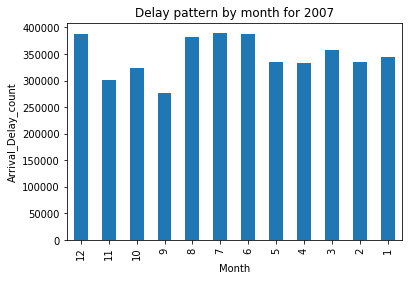

In [48]:
my_plot = delay_effect_2007.plot(kind='bar',x='Month', y='Arrival_Delay_count', 
                                 legend=None, title="Delay pattern by month for 2007")
my_plot.set_xlabel("Month")
my_plot.set_ylabel("Arrival_Delay_count")

Text(0, 0.5, 'Arrival_Delay_count')

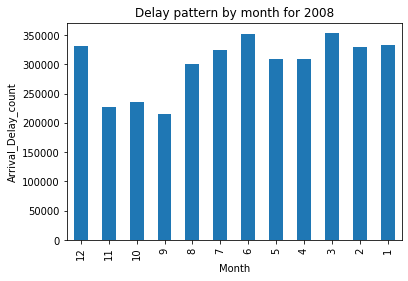

In [49]:
my_plot = delay_effect_2008.plot(kind='bar',x='Month', y='Arrival_Delay_count', legend=None, 
                                 title="Delay pattern by month for 2008")
my_plot.set_xlabel("Month")
my_plot.set_ylabel("Arrival_Delay_count")

Based on the above plot we can see that for both the years the delay pattern is similar. For both the years, the months June, July, August and December has significantly higher delays compared to the other months. Also, the months September, October and November has lesser number of delays.

#### 4. Do you see any increase or decrease in delays on weekends?

In [20]:
delay_effect_weekend = air_travel.filter((air_travel['ArrDelay']>0) | (air_travel['DepDelay'] > 0)).\
groupBy('DayOfWeek').\
agg(count('ArrDelay').alias("Arrival_Delay_count"), count('DepDelay').alias("Departure_Delay_count")).\
orderBy('DayOfWeek','Arrival_Delay_count','Departure_Delay_count',ascending=False).toPandas()

Text(0, 0.5, 'Arrival_Delay_count')

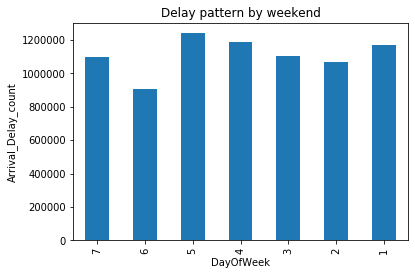

In [21]:
my_plot = delay_effect_weekend.plot(kind='bar',x='DayOfWeek', y='Arrival_Delay_count', 
                                 legend=None, title="Delay pattern by weekend")
my_plot.set_xlabel("DayOfWeek")
my_plot.set_ylabel("Arrival_Delay_count")

Based on the above plot we can infer that the delays increase as the week progress and the delay reduce over the weekend.

#### 5.Are flights equally distributed throughout the day?  
    - Plot the distribution of DepTime, ArrTime (actual departure and arrival time)

Text(0.5, 1.0, 'Monday')

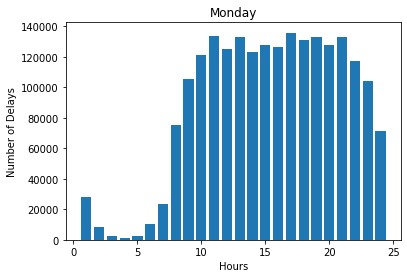

In [36]:
time_day = air_travel.filter("ArrTime != 'NA'").groupby('ArrTime', 'DayOfWeek').count()
time_day = time_day.filter('DayOfWeek == 1').withColumn('ArrTime', time_day.ArrTime.cast('int').cast('int')).orderBy('ArrTime').toPandas()
time_day['minutes'] = range(1, len(time_day)+1)
time_day['hours'] = time_day['minutes']//60
time_day = time_day.groupby('hours').sum()[['count']]
plt.bar(range(1, 25), time_day.iloc[:-1]['count'].values)
plt.ylabel('Number of Delays')
plt.xlabel('Hours')
plt.title('Monday')

Text(0.5, 1.0, 'Tuesday')

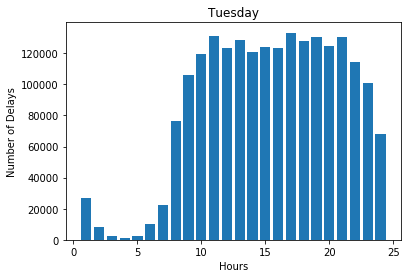

In [30]:
time_day = air_travel.filter("ArrTime != 'NA'").groupby('ArrTime', 'DayOfWeek').count()
time_day = time_day.filter('DayOfWeek == 2').withColumn('ArrTime', time_day.ArrTime.cast('int').cast('int')).orderBy('ArrTime').toPandas()
time_day['minutes'] = range(1, len(time_day)+1)
time_day['hours'] = time_day['minutes']//60
time_day = time_day.groupby('hours').sum()[['count']]
plt.bar(range(1, 25), time_day.iloc[:-1]['count'].values)
plt.ylabel('Number of Delays')
plt.xlabel('Hours')
plt.title('Tuesday')

Text(0.5, 1.0, 'Wednesday')

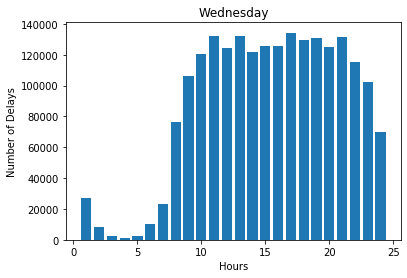

In [31]:
time_day = air_travel.filter("ArrTime != 'NA'").groupby('ArrTime', 'DayOfWeek').count()
time_day = time_day.filter('DayOfWeek == 3').withColumn('ArrTime', time_day.ArrTime.cast('int').cast('int')).orderBy('ArrTime').toPandas()
time_day['minutes'] = range(1, len(time_day)+1)
time_day['hours'] = time_day['minutes']//60
time_day = time_day.groupby('hours').sum()[['count']]
plt.bar(range(1, 25), time_day.iloc[:-1]['count'].values)
plt.ylabel('Number of Delays')
plt.xlabel('Hours')
plt.title('Wednesday')

Text(0.5, 1.0, 'Thursday')

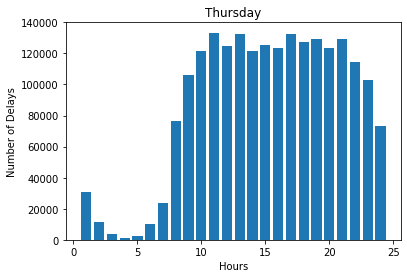

In [32]:
time_day = air_travel.filter("ArrTime != 'NA'").groupby('ArrTime', 'DayOfWeek').count()
time_day = time_day.filter('DayOfWeek == 4').withColumn('ArrTime', time_day.ArrTime.cast('int').cast('int')).orderBy('ArrTime').toPandas()
time_day['minutes'] = range(1, len(time_day)+1)
time_day['hours'] = time_day['minutes']//60
time_day = time_day.groupby('hours').sum()[['count']]
plt.bar(range(1, 25), time_day.iloc[:-1]['count'].values)
plt.ylabel('Number of Delays')
plt.xlabel('Hours')
plt.title('Thursday')

Text(0.5, 1.0, 'Friday')

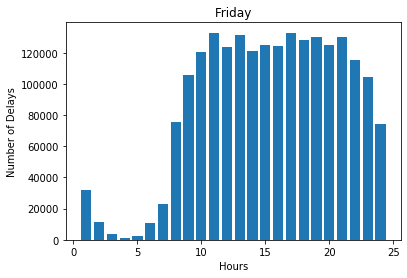

In [33]:
time_day = air_travel.filter("ArrTime != 'NA'").groupby('ArrTime', 'DayOfWeek').count()
time_day = time_day.filter('DayOfWeek == 5').withColumn('ArrTime', time_day.ArrTime.cast('int').cast('int')).orderBy('ArrTime').toPandas()
time_day['minutes'] = range(1, len(time_day)+1)
time_day['hours'] = time_day['minutes']//60
time_day = time_day.groupby('hours').sum()[['count']]
plt.bar(range(1, 25), time_day.iloc[:-1]['count'].values)
plt.ylabel('Number of Delays')
plt.xlabel('Hours')
plt.title('Friday')

Text(0.5, 1.0, 'Saturday')

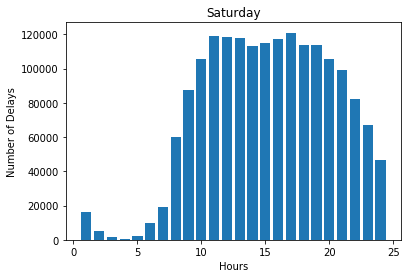

In [34]:
time_day = air_travel.filter("ArrTime != 'NA'").groupby('ArrTime', 'DayOfWeek').count()
time_day = time_day.filter('DayOfWeek == 6').withColumn('ArrTime', time_day.ArrTime.cast('int').cast('int')).orderBy('ArrTime').toPandas()
time_day['minutes'] = range(1, len(time_day)+1)
time_day['hours'] = time_day['minutes']//60
time_day = time_day.groupby('hours').sum()[['count']]
plt.bar(range(1, 25), time_day.iloc[:-1]['count'].values)
plt.ylabel('Number of Delays')
plt.xlabel('Hours')
plt.title('Saturday')

Text(0.5, 1.0, 'Sunday')

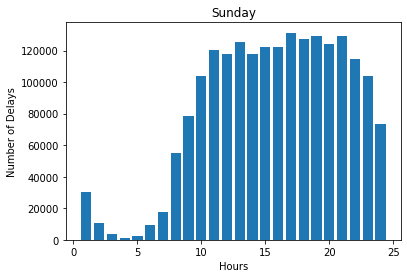

In [35]:
time_day = air_travel.filter("ArrTime != 'NA'").groupby('ArrTime', 'DayOfWeek').count()
time_day = time_day.filter('DayOfWeek == 7').withColumn('ArrTime', time_day.ArrTime.cast('int').cast('int')).orderBy('ArrTime').toPandas()
time_day['minutes'] = range(1, len(time_day)+1)
time_day['hours'] = time_day['minutes']//60
time_day = time_day.groupby('hours').sum()[['count']]
plt.bar(range(1, 25), time_day.iloc[:-1]['count'].values)
plt.ylabel('Number of Delays')
plt.xlabel('Hours')
plt.title('Sunday')

Based on the above visualizations we can conclude that the flights are not equally distributed throughout the day. The flight traffic is the least between 12am and 5am, and the traffic gradually increase over the time.


#### 6.Do you see the worst delays at any certain times of the day?  
    - Contrast DepTime, ArrTime with CRSDepTime, CRSArrTime (scheduled arrival and departure time; CRS is the Computer Reservation System)  
    - Your final output should look like a chart (i.e. bar chart, line chart, etc.), the chart can also be supplemented by a table as needed.

Calculating average arrival and departure delay through the day for Tuesday.

In [43]:
arrival_delays = air_travel.filter("ArrTime != 'NA'").groupby('ArrTime', 'DayOfWeek').mean('ArrDelay')
arrival_delays = arrival_delays.filter('DayOfWeek == 2').withColumn('ArrTime', arrival_delays.ArrTime.cast('int').cast('int')).orderBy('ArrTime').toPandas()
arrival_delays['minutes'] = range(1, len(arrival_delays)+1)
arrival_delays['hours'] = arrival_delays['minutes']//60
arrival_delays = arrival_delays.groupby('hours').mean()[['avg(ArrDelay)']]

Text(0.5, 1.0, 'Tuesday')

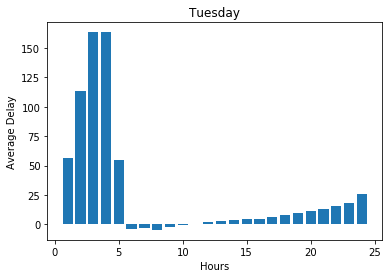

In [44]:
plt.bar(range(1, 25), arrival_delays.iloc[:-1]['avg(ArrDelay)'].values)
plt.ylabel('Average Delay')
plt.xlabel('Hours')
plt.title('Tuesday')

In [45]:
departure_delays = air_travel.filter("DepTime != 'NA'").groupby('DepTime', 'DayOfWeek').mean('DepDelay')
departure_delays = departure_delays.filter('DayOfWeek == 2').withColumn('DepTime', departure_delays.DepTime.cast('int').cast('int')).orderBy('DepTime').toPandas()
departure_delays['minutes'] = range(1, len(departure_delays)+1)
departure_delays['hours'] = departure_delays['minutes']//60
departure_delays = departure_delays.groupby('hours').mean()[['avg(DepDelay)']]

Text(0.5, 1.0, 'Tuesday')

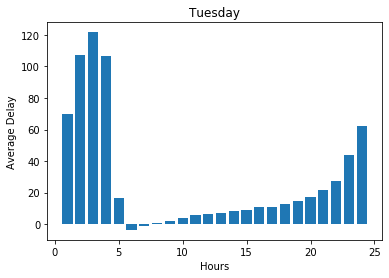

In [46]:
plt.bar(range(1, 25), departure_delays['avg(DepDelay)'].values)
plt.ylabel('Average Delay')
plt.xlabel('Hours')
plt.title('Tuesday')

Significant delays occur during 12am to 5 am. Also, based on the earlier question eventhough the number of flights are lesser between 12am and 5am, the delays associated with these flighs are significantly higher than the remaining flights.